## A1

1. **Model Specification**:

   - The prior for the parameters $\theta$ and $\tau$ is $p(\theta,\tau)\propto 1$.
   - The likelihood is:
     $$
     p(\mathbf{x} \mid \theta, \tau)
     = \prod_{i=1}^n \mathcal{N}\bigl(x_i \mid \theta, \tau^{-1}\bigr),
     $$
     where $\tau$ is the precision (inverse variance).

   - The full conditionals are:
     - $p(\theta \mid \tau, \mathbf{x})$ is a normal distribution.
     - $p(\tau \mid \theta, \mathbf{x})$ is a gamma distribution.

2. **Full Conditionals**:

   - The full conditional for $\theta$ is:
     $$
     \theta \mid \tau, \mathbf{x}
     \sim \mathcal{N}\Bigl(
       \frac{\tau \sum_{i=1}^n x_i}{\tau n + 1},\,
       \frac{1}{\tau n + 1}
     \Bigr).
     $$
   - The full conditional for $\tau$ is:
     $$
     \tau \mid \theta, \mathbf{x}
     \sim \Gamma\Bigl(
       \frac{n}{2} + 1,\,
       \frac{\sum_{i=1}^n (x_i - \theta)^2}{2} + 1
     \Bigr).
     $$


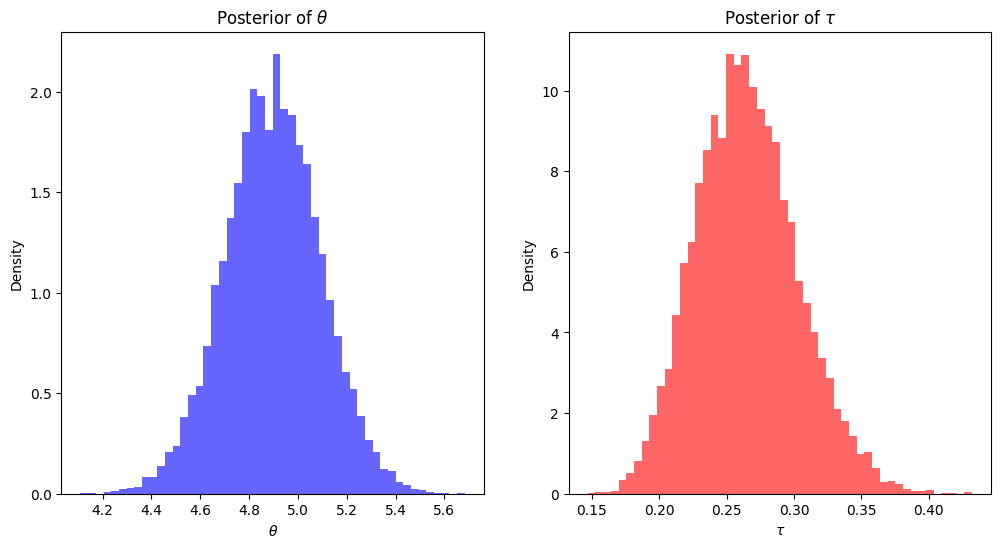

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def gibbs_sampler(x, num_samples=10000, burn_in=1000):
    n = len(x)
    theta_samples = []
    tau_samples = []
    
    # Initialize theta and tau
    theta = np.mean(x)
    tau = 1.0 / np.var(x)
    
    for _ in range(num_samples + burn_in):
        # Sample theta from its full conditional
        theta_mean = (tau * np.sum(x)) / (tau * n + 1)
        theta_var = 1.0 / (tau * n + 1)
        theta = stats.norm(loc=theta_mean, scale=np.sqrt(theta_var)).rvs()
        
        # Sample tau from its full conditional
        alpha = (n / 2) + 1
        beta = (np.sum((x - theta)**2) / 2) + 1
        tau = stats.gamma(a=alpha, scale=1/beta).rvs()
        
        if _ >= burn_in:
            theta_samples.append(theta)
            tau_samples.append(tau)
    
    return np.array(theta_samples), np.array(tau_samples)

# Generate synthetic data
n = 100
m = 5
s = 2
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Run Gibbs sampler
theta_samples, tau_samples = gibbs_sampler(x)

# Plot the posterior distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(theta_samples, bins=50, density=True, alpha=0.6, color='b')
plt.title('Posterior of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(tau_samples, bins=50, density=True, alpha=0.6, color='r')
plt.title('Posterior of $\\tau$')
plt.xlabel('$\\tau$')
plt.ylabel('Density')

plt.show()

## A2

Given the prior:  
- $\theta \sim \mathcal{N}(\theta_0, \tau^{-1}\tau_0^2)$  
- $\tau \sim \text{Gamma}\!\Bigl(\tfrac{\alpha}{2}, \tfrac{\lambda}{2}\Bigr)$  

#### **Full Conditionals**

##### **For $\tau \mid \theta, \mathbf{x}$**:

Using Bayes' theorem, we update $\tau$:
$$
p(\tau \mid \theta, \mathbf{x})
\;\propto\;
p(\mathbf{x} \mid \theta, \tau)\;p(\tau).
$$

Since the likelihood follows a **normal distribution**, the posterior remains Gamma:
$$
p(\tau \mid \theta, \mathbf{x})
\;\sim\;
\text{Gamma}\!\Bigl(
  \tfrac{n + \alpha}{2},\;
  \tfrac{\sum (x_i - \theta)^2 + \lambda}{2}
\Bigr).
$$

##### **For $\theta \mid \tau, \mathbf{x}$**:

Using the conjugacy property, the posterior for $\theta$ remains normal:
$$
p(\theta \mid \tau, \mathbf{x})
\;\sim\;
\mathcal{N}\!\Bigl(
  \tfrac{n\bar{x} + \tau_0^2 \,\theta_0}{n + \tau_0^2},\;
  \tfrac{1}{\tau\,(n + \tau_0^2)}
\Bigr).
$$


### **Interpretation of Prior Parameters**

- $\tau_0^2$ acts as a prior belief about the variance of $\theta$.  
- $\alpha$ and $\lambda$ control the prior weight on precision $\tau$.  
- These act as **pseudo-data**, influencing the posterior similarly to additional observations.

Thus, the **updated Gibbs sampler** correctly samples from these distributions, ensuring a Bayesian update.


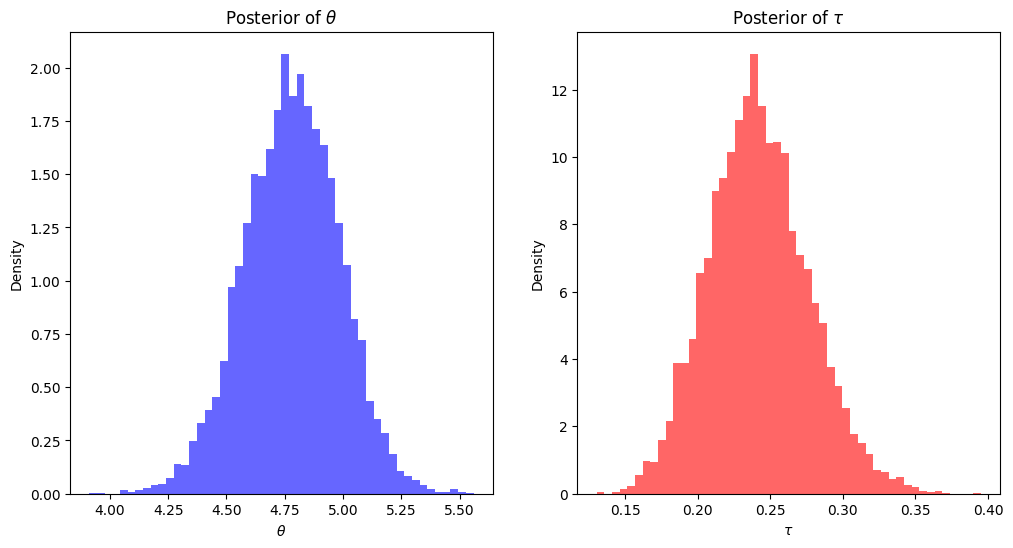

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def gibbs_sampler(x, theta_0, tau_0, alpha, lambda_, num_samples=10000, burn_in=1000):
    n = len(x)
    theta_samples = []
    tau_samples = []
    
    # Initialize theta and tau
    theta = np.mean(x)
    tau = 1.0 / np.var(x)
    
    for _ in range(num_samples + burn_in):
        # Sample theta from its full conditional
        theta_mean = (tau * np.sum(x) + theta_0 / tau_0**2) / (tau * n + 1 / tau_0**2)
        theta_var = 1.0 / (tau * n + 1 / tau_0**2)
        theta = stats.norm(loc=theta_mean, scale=np.sqrt(theta_var)).rvs()
        
        # Sample tau from its full conditional
        alpha_post = (alpha + n) / 2
        lambda_post = (lambda_ + np.sum((x - theta)**2)) / 2
        tau = stats.gamma(a=alpha_post, scale=1/lambda_post).rvs()
        
        if _ >= burn_in:
            theta_samples.append(theta)
            tau_samples.append(tau)
    
    return np.array(theta_samples), np.array(tau_samples)

# Generate synthetic data
n = 100
m = 5
s = 2
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Prior hyperparameters
theta_0 = 0
tau_0 = 1
alpha = 2
lambda_ = 2

# Run Gibbs sampler
theta_samples, tau_samples = gibbs_sampler(x, theta_0, tau_0, alpha, lambda_)

# Plot the posterior distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(theta_samples, bins=50, density=True, alpha=0.6, color='b')
plt.title('Posterior of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(tau_samples, bins=50, density=True, alpha=0.6, color='r')
plt.title('Posterior of $\\tau$')
plt.xlabel('$\\tau$')
plt.ylabel('Density')

plt.show()

## A3

### **Step 1: Bayesian Update for the Multinomial-Dirichlet Model**

We assume:

- **Likelihood:**
  $$
  x_i \sim \text{Multinomial}(n, \theta)
  $$
- **Prior:**
  $$
  \theta \sim \text{Dirichlet}(\alpha_1, \alpha_2, \dots, \alpha_k)
  $$

The **joint likelihood** given $\theta$ is:

$$
p(x \mid \theta) \;=\; \frac{n!}{x_1!\,x_2!\,\dots\,x_k!} \;\prod_{i=1}^{k} \theta_i^{\,x_i}.
$$

The **Dirichlet prior** is:

$$
p(\theta) \;=\; \frac{1}{B(\alpha)} \;\prod_{i=1}^{k} \theta_i^{\,\alpha_i - 1},
$$

where the Beta function is:

$$
B(\alpha) \;=\; \frac{\prod_{i=1}^{k}\Gamma(\alpha_i)}{\Gamma\!\bigl(\sum \alpha_i\bigr)}.
$$

Using **Bayes' Theorem**:

$$
p(\theta \mid x) \;\propto\; p(x \mid \theta)\,p(\theta).
$$

$$
p(\theta \mid x) \;\propto\; 
\Bigl(\prod_{i=1}^{k} \theta_i^{\,x_i}\Bigr)\,
\Bigl(\prod_{i=1}^{k} \theta_i^{\,\alpha_i - 1}\Bigr).
$$

$$
p(\theta \mid x) \;\propto\; \prod_{i=1}^{k} \theta_i^{\,x_i + \alpha_i - 1}.
$$

Since this matches the **Dirichlet** form, we conclude:

$$
p(\theta \mid x)
\;\sim\;
\text{Dirichlet}\bigl(\alpha_1 + x_1,\;\alpha_2 + x_2,\;\dots,\;\alpha_k + x_k\bigr).
$$

Thus, the **posterior hyperparameters** are:

$$
\alpha_i' \;=\; \alpha_i + x_i.
$$

### **Step 2: Interpretation Based on Bayes' Theorem**

- The prior parameters $ \alpha_i $ **act like pseudo-counts** before observing data.
- The likelihood counts $ x_i $ **update the prior**, reflecting observed data.
- The posterior **mean estimate**:

$$
E[\theta_i \mid x] 
\;=\; 
\frac{\alpha_i + x_i}{\sum_{j}(\alpha_j + x_j)}.
$$

This confirms that **the prior contributes information similar to additional data points**.

### **Step 3: Gibbs Sampler for the Multinomial-Dirichlet Model**

Using the derived posterior, we update the parameters as follows:

$$
\theta^{(t+1)} 
\;\sim\; 
\text{Dirichlet}(\alpha_1 + x_1,\;\alpha_2 + x_2,\;\dots,\;\alpha_k + x_k).
$$

This provides **samples from the posterior** for each category.


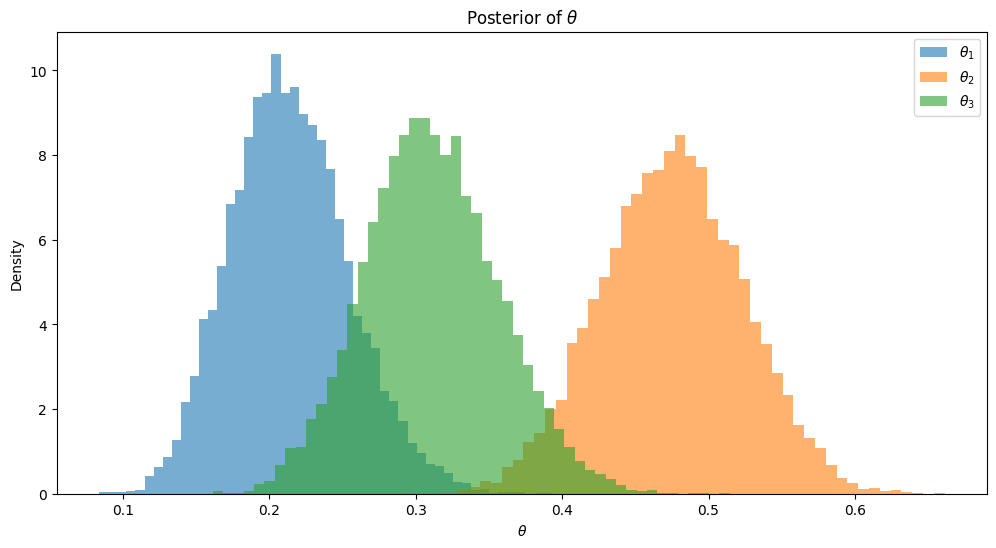

In [4]:
import numpy as np
import scipy.stats as stats

def gibbs_sampler_multinomial_dirichlet(x, alpha, num_samples=10000, burn_in=1000):
    k = len(x)
    theta_samples = []
    
    # Initialize theta
    theta = np.random.dirichlet(alpha)
    
    for _ in range(num_samples + burn_in):
        # Sample theta from its full conditional (Dirichlet)
        theta = np.random.dirichlet(alpha + x)
        
        if _ >= burn_in:
            theta_samples.append(theta)
    
    return np.array(theta_samples)

# Generate synthetic data
n = 100
k = 3
x = np.random.multinomial(n, [0.2, 0.5, 0.3])

# Prior hyperparameters
alpha = np.array([1, 1, 1])

# Run Gibbs sampler
theta_samples = gibbs_sampler_multinomial_dirichlet(x, alpha)

# Plot the posterior distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(k):
    plt.hist(theta_samples[:, i], bins=50, density=True, alpha=0.6, label=f'$\\theta_{i+1}$')
plt.title('Posterior of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.show()